# Carbon Use Efficiency of a COMETS Simulation

In [102]:
import cometspy as c
import cobra
import matplotlib.pyplot as plt

In [103]:
import numpy as np

In [104]:
# Import my own helper functions
from cue_utils import utils

## Set up and run COMETS simulation

In [105]:
# Create empty 1x1 layout
test_tube = c.layout()

# Add 11mM glucose and remove o2
test_tube.set_specific_metabolite('glc__D_e', 0.011)
test_tube.set_specific_metabolite('o2_e', 1000)

# Add the rest of nutrients unlimited (ammonia, phosphate, water and protons)
test_tube.set_specific_metabolite('nh4_e',1000);
test_tube.set_specific_metabolite('pi_e',1000);
test_tube.set_specific_metabolite('h2o_e',1000);
test_tube.set_specific_metabolite('h_e',1000);

building empty layout model
models will need to be added with layout.add_model()


In [106]:
# create the model using CobraPy functionality
e_coli_cobra = cobra.io.load_model('textbook')

# use the loaded model to build a comets model
e_coli = c.model(e_coli_cobra)

# remove the bounds from glucose import (will be set dynamically by COMETS)
e_coli.change_bounds('EX_glc__D_e', -1000, 1000)
e_coli.change_bounds('EX_ac_e', -1000, 1000)

# set the model's initial biomass
e_coli.initial_pop = [0, 0, 5e-6]

# add it to the test_tube
test_tube.add_model(e_coli)

In [107]:
e_coli_cobra.reactions

[<Reaction ACALD at 0x159002a30>,
 <Reaction ACALDt at 0x1590670d0>,
 <Reaction ACKr at 0x159067d30>,
 <Reaction ACONTa at 0x159067bb0>,
 <Reaction ACONTb at 0x15906b610>,
 <Reaction ACt2r at 0x15906b820>,
 <Reaction ADK1 at 0x159067fd0>,
 <Reaction AKGDH at 0x159067b20>,
 <Reaction AKGt2r at 0x15906e310>,
 <Reaction ALCD2x at 0x15906ea00>,
 <Reaction ATPM at 0x15906e820>,
 <Reaction ATPS4r at 0x159067b50>,
 <Reaction Biomass_Ecoli_core at 0x1590676a0>,
 <Reaction CO2t at 0x159067700>,
 <Reaction CS at 0x15906e550>,
 <Reaction CYTBD at 0x159073f10>,
 <Reaction D_LACt2 at 0x1590735b0>,
 <Reaction ENO at 0x15907ee20>,
 <Reaction ETOHt2r at 0x15907ec40>,
 <Reaction EX_ac_e at 0x159073c70>,
 <Reaction EX_acald_e at 0x159073dc0>,
 <Reaction EX_akg_e at 0x15907eca0>,
 <Reaction EX_co2_e at 0x159073b20>,
 <Reaction EX_etoh_e at 0x15907e7f0>,
 <Reaction EX_for_e at 0x15907ec10>,
 <Reaction EX_fru_e at 0x159086bb0>,
 <Reaction EX_fum_e at 0x159086cd0>,
 <Reaction EX_glc__D_e at 0x159086df0>,
 <

In [108]:
# Set the parameters that are different from the default
sim_params = c.params()

sim_params.set_param('defaultVmax', 18.5)
sim_params.set_param('defaultKm', 0.000015)
sim_params.set_param('maxCycles', 1000)
sim_params.set_param('timeStep', 0.01)
sim_params.set_param('spaceWidth', 1)
sim_params.set_param('maxSpaceBiomass', 10)
sim_params.set_param('minSpaceBiomass', 1e-11)
sim_params.set_param('writeMediaLog', True)
sim_params.set_param('writeFluxLog', True)

In [109]:
experiment = c.comets(test_tube, sim_params)

In [110]:
experiment.run()


Running COMETS simulation ...


/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:973: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  smat.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:979: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  bnd.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:987: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  met_n.to_csv(f, mode='a', line_terminator = '\n', header=False, index=False)
/Users/helenscott/opt/miniconda3/lib/python3.9/site-packages/cometspy/model.py:991: FutureWarning: the 'line_terminator'' keyword is deprecated, use 'lineterminator' instead.
  rxn_n.to_csv(f, mode='a', line_terminator = '\n', header=False, 

Done!


Text(0, 0.5, 'Biomass (gr.)')

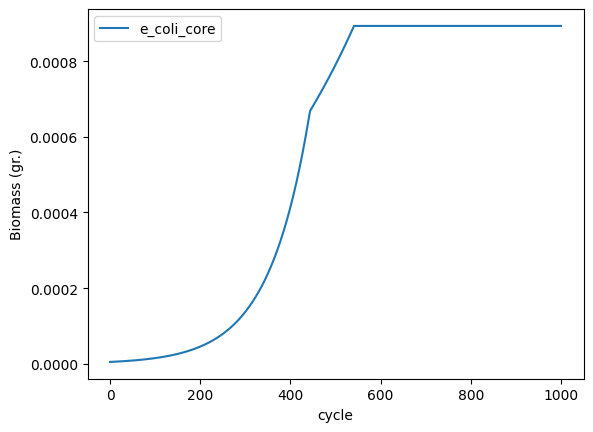

In [111]:
ax = experiment.total_biomass.plot(x = 'cycle')
ax.set_ylabel("Biomass (gr.)")


Text(0, 0.5, 'Concentration (mmol)')

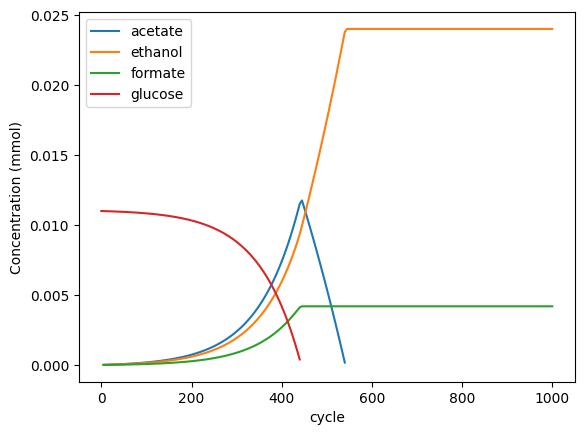

In [112]:
media = experiment.media.copy()
media = media[media.conc_mmol<900]

fig, ax = plt.subplots()
media.groupby('metabolite').plot(x='cycle', ax =ax, y='conc_mmol')
ax.legend(('acetate','ethanol', 'formate', 'glucose'))
ax.set_ylabel("Concentration (mmol)")


## Calculate CUE and plot

In [113]:
# Get the exchange reactions for the E coli core model
c_ex_rxns = utils.atomExchangeMetabolite(e_coli_cobra)
c_ex_rxns

{'EX_ac_e': 2,
 'EX_acald_e': 2,
 'EX_akg_e': 5,
 'EX_co2_e': 1,
 'EX_etoh_e': 2,
 'EX_for_e': 1,
 'EX_fru_e': 6,
 'EX_fum_e': 4,
 'EX_glc__D_e': 6,
 'EX_gln__L_e': 5,
 'EX_glu__L_e': 5,
 'EX_lac__D_e': 3,
 'EX_mal__L_e': 4,
 'EX_pyr_e': 3,
 'EX_succ_e': 4}

In [114]:
# Get the fluxes for each exchange reaction for each cycle of the experiment
fluxes = experiment.fluxes_by_species['e_coli_core'].copy()
# Create an empty array to hold the CUE for each cycle
cue_list = []
# Loop through each cycle and calculate the CUE from the exchange fluxes
for index, row in fluxes.iterrows():
    # Get the exchange fluxes for the current cycle
    c_ex_fluxes = [float(row[r]) * -c for r, c in c_ex_rxns.items()]
    # Calculate the CUE for the current cycle and add it to the cue array
    uptake = sum([flux for flux in c_ex_fluxes if flux > 0])
    release = sum([flux for flux in c_ex_fluxes if flux < 0])
    if uptake == 0:
        cue_list.append(0)
    else:
        cue = 1 + release/uptake
    cue_list.append(cue)

In [115]:
cue_list

[0.4263944737657729,
 0.42639459359631016,
 0.4263947203838322,
 0.42639485444983827,
 0.42639499631016553,
 0.4263951463903687,
 0.426395305170286,
 0.4263954731457754,
 0.426395650937722,
 0.42639583904981804,
 0.4263960381183771,
 0.42639624882836424,
 0.42639647187678353,
 0.426396707968697,
 0.4263969579184881,
 0.426397222557774,
 0.42639750283035505,
 0.42639779961915814,
 0.4263981139569635,
 0.42639844697919516,
 0.42639879976304396,
 0.4263991736047279,
 0.42639956977795,
 0.4263999897133519,
 0.42640043489665536,
 0.4264009069481296,
 0.4264014075635103,
 0.4264019385968547,
 0.42640250204829566,
 0.42640309999699577,
 0.426403734711143,
 0.4264044087083384,
 0.42640512447496437,
 0.4264058849812624,
 0.4264066931512588,
 0.4264075523922871,
 0.42640846611596495,
 0.42640943825727784,
 0.42641047293848455,
 0.4264115746008791,
 0.42641274819881425,
 0.4264139990209841,
 0.42641533285469346,
 0.4264167559363985,
 0.4264182752177359,
 0.4264198981738494,
 0.42642163308952885,


In [116]:
len(cue_list)

292

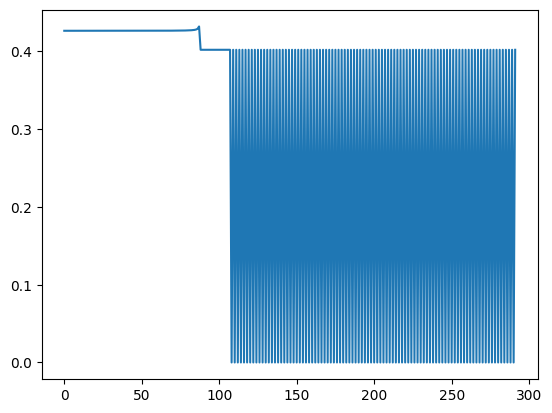

In [117]:
# Plot the CUE for each cycle
fig, ax = plt.subplots()
ax.plot(cue_list)
# Fix so x axis is labeled by cycle
ax.set_xlabel("Cycle")

In [118]:
row = fluxes[fluxes.cycle == 5]

In [119]:
row

,cycle,x,y,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
0,5,1,1,0.0,0.0,-20.069009,1.198307,1.198307,-20.069009,0.0,...,-0.798353,0.0,0.0,0.0,0.0,-0.1987,19.043737,-0.1987,-0.599653,17.37001


In [120]:
c_ex_fluxes = [float(row[r]) * -c for r, c in c_ex_rxns.items()]

In [121]:
c_ex_fluxes

[-40.138018892,
 0.0,
 0.0,
 -16.122641044,
 0.0,
 -7.3228191098,
 0.0,
 0.0,
 110.84879091600001,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [122]:
sum([flux for flux in c_ex_fluxes if flux < 0])

-63.5834790458

In [123]:
sum([flux for flux in c_ex_fluxes if flux > 0])

110.84879091600001

In [124]:
1 + sum([flux for flux in c_ex_fluxes if flux < 0]) / sum([flux for flux in c_ex_fluxes if flux > 0])

0.4263944737657729

In [125]:
list(c_ex_rxns.items())[0][0]

'EX_ac_e'

In [126]:
float(row['EX_ac_e'])

20.069009446

In [127]:
# Look at the 
# Not necessary, just useful when writing the equation
experiment.fluxes_by_species['e_coli_core']

,cycle,x,y,ACALD,ACALDt,ACKr,ACONTa,ACONTb,ACt2r,ADK1,...,RPI,SUCCt2_2,SUCCt3,SUCDi,SUCOAS,TALA,THD2,TKT1,TKT2,TPI
0,5,1,1,0.0,0.0,-20.069009,1.198307,1.198307,-20.069009,0.0,...,-0.798353,0.0,0.0,0.0,0.0,-0.198700,19.043737,-0.198700,-0.599653,17.370010
1,10,1,1,0.0,0.0,-20.068992,1.198306,1.198306,-20.068992,0.0,...,-0.798353,0.0,0.0,0.0,0.0,-0.198700,19.043731,-0.198700,-0.599653,17.370000
2,15,1,1,0.0,0.0,-20.068974,1.198306,1.198306,-20.068974,0.0,...,-0.798352,0.0,0.0,0.0,0.0,-0.198700,19.043724,-0.198700,-0.599653,17.369988
3,20,1,1,0.0,0.0,-20.068955,1.198306,1.198306,-20.068955,0.0,...,-0.798352,0.0,0.0,0.0,0.0,-0.198699,19.043717,-0.198699,-0.599653,17.369976
4,25,1,1,0.0,0.0,-20.068935,1.198305,1.198305,-20.068935,0.0,...,-0.798352,0.0,0.0,0.0,0.0,-0.198699,19.043710,-0.198699,-0.599652,17.369963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,980,1,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
196,985,1,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
197,990,1,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
198,995,1,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [128]:
cue

0.40196352892633

In [129]:
e_coli_cobra.reactions

[<Reaction ACALD at 0x159002a30>,
 <Reaction ACALDt at 0x1590670d0>,
 <Reaction ACKr at 0x159067d30>,
 <Reaction ACONTa at 0x159067bb0>,
 <Reaction ACONTb at 0x15906b610>,
 <Reaction ACt2r at 0x15906b820>,
 <Reaction ADK1 at 0x159067fd0>,
 <Reaction AKGDH at 0x159067b20>,
 <Reaction AKGt2r at 0x15906e310>,
 <Reaction ALCD2x at 0x15906ea00>,
 <Reaction ATPM at 0x15906e820>,
 <Reaction ATPS4r at 0x159067b50>,
 <Reaction Biomass_Ecoli_core at 0x1590676a0>,
 <Reaction CO2t at 0x159067700>,
 <Reaction CS at 0x15906e550>,
 <Reaction CYTBD at 0x159073f10>,
 <Reaction D_LACt2 at 0x1590735b0>,
 <Reaction ENO at 0x15907ee20>,
 <Reaction ETOHt2r at 0x15907ec40>,
 <Reaction EX_ac_e at 0x159073c70>,
 <Reaction EX_acald_e at 0x159073dc0>,
 <Reaction EX_akg_e at 0x15907eca0>,
 <Reaction EX_co2_e at 0x159073b20>,
 <Reaction EX_etoh_e at 0x15907e7f0>,
 <Reaction EX_for_e at 0x15907ec10>,
 <Reaction EX_fru_e at 0x159086bb0>,
 <Reaction EX_fum_e at 0x159086cd0>,
 <Reaction EX_glc__D_e at 0x159086df0>,
 <